# Midterm - Data sets

__Wine Quality Data Set__

## Expectation

__1. Understanding and explaining the data set.__

The Wine Quality Data set is a red wine data set that contains 11 chemical attirbutes. These attributes together are given a wine quality score from 0 (Worse) to 10 (Best score). The purpose is find relationships in these attributes and see if there is a relationship between these attributes and good quality score.  

__2. Processing data, cleaning up.__

In [1]:
import os
import urllib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root = "https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/midterm/data_sets/4_wine_quality"
path_file = os.path.join('dataset','redwine')
file_name = 'winequality-red.csv'
file = root +  "/"  + file_name

def fetch_data(file = file, path=path_file):
    if not os.path.isdir(path_file):
        os.makedirs(path_file)
    file_path = os.path.join(path_file,"winequality-red.csv")
    urllib.request.urlretrieve(file, file_path)
    return

def load_data(path = path_file, file_name = file_name):
    csv = os.path.join(path_file, file_name)
    return pd.read_csv(csv, sep=";")

fetch_data()
df_wine = load_data()

In [3]:
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [5]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


It seems the highest quality wine is 8 and the lowest is 3. Average is around 5.6

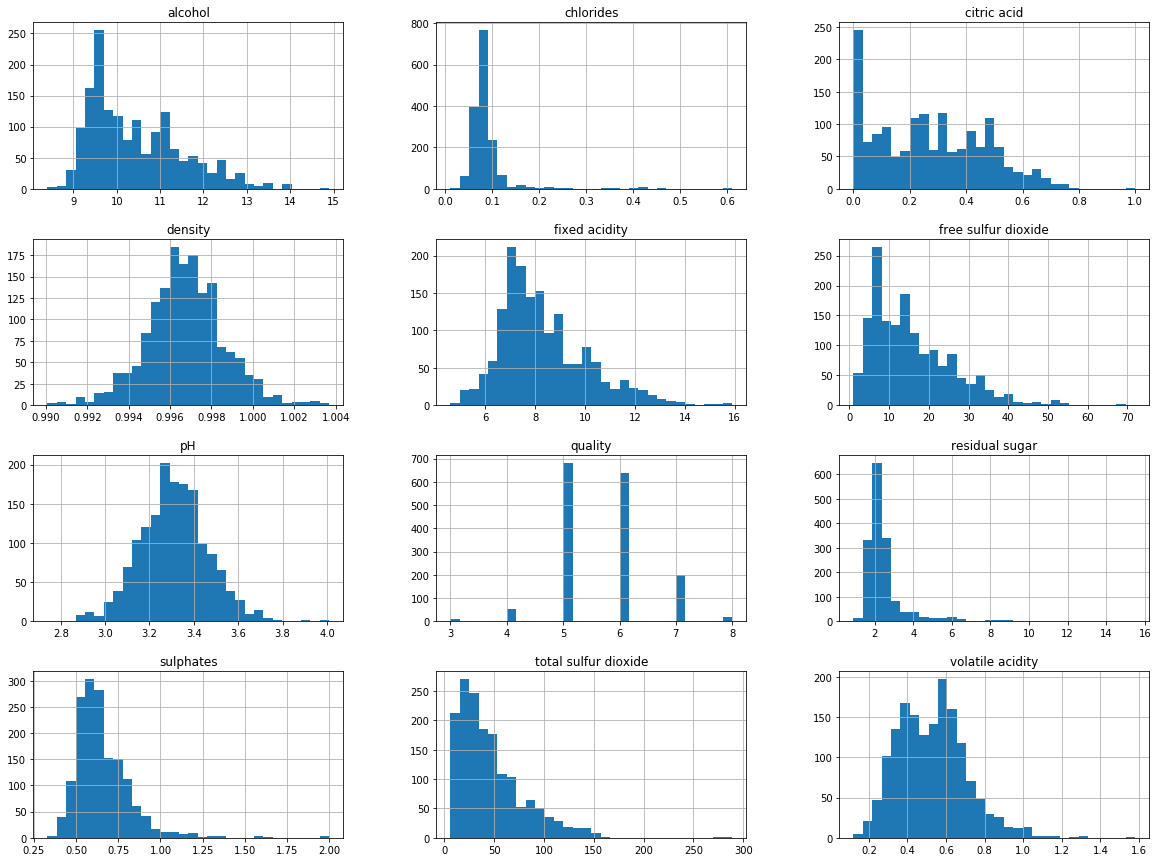

In [6]:
%matplotlib inline
df_wine.hist(bins=30,figsize=(20,15))
plt.show()

#### EDA through the training set

In [7]:
correlation_matrx = df_wine.corr()
correlation_matrx['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [8]:
attr_l = [ attribute for attribute in correlation_matrx.columns.values]

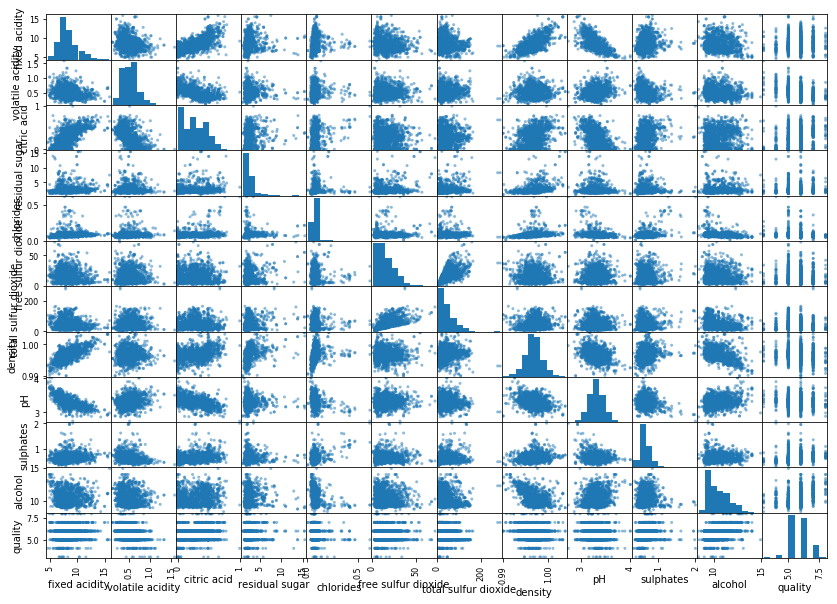

In [9]:
%matplotlib inline
pd.plotting.scatter_matrix(df_wine[attr_l], figsize=(14,10))
plt.show()

### Checking for errors and Cleaning up

In [10]:
df_wine.notnull().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

It seems there is no missing values!!

## Dividing your data into a training and test set.

In [11]:
#1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
group = [0,1,2]
categories = pd.cut(df_wine['quality'], bins, labels = group)
df_wine['quality'] = categories

In [12]:
df_wine['quality'].value_counts()

1    1319
2     217
0      63
Name: quality, dtype: int64

In [13]:
X = df_wine.iloc[:, :-1]
y = df_wine.iloc[:, 11]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 50)

In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

## Choosing the relevant algorithm.

#### Logistic Regression

In [16]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 50)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

85.5


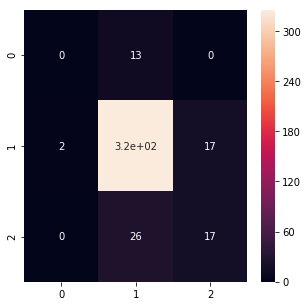

In [17]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

#### KNN

In [18]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

86.0


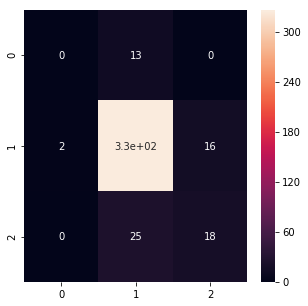

In [19]:
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

#### Naive Bayes

In [20]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

79.0


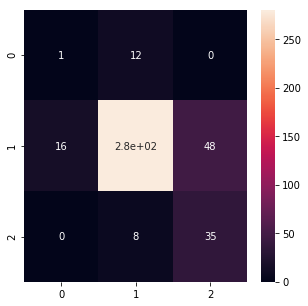

In [21]:
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

#### Decision Tree

In [22]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

82.5


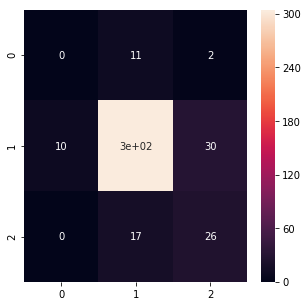

In [23]:
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,  accuracy_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

#### Random Forest

In [24]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

89.0


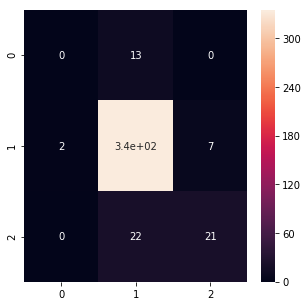

In [25]:
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

#### SVM

In [26]:
#Fitting SVM to the dataset
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 50)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=50, shrinking=True,
  tol=0.001, verbose=False)

87.5


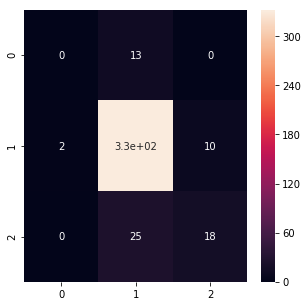

In [27]:
y_pred = classifor.predict(X_test)
#Making a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot=True)
ac = accuracy_score(y_test, y_pred)
print(ac*100)

### Evaluating your learning performance. Making sure your results does not depend on your choosing parameters.

It seems based on running the model under the same parameters. Decision tree gave the best results. Lets try use cross validation score to see if there is a difference.

In [32]:
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)
rf_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
rf_score.mean()


0.8483030650276641

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 50)
classifier.fit(X_train, y_train)
rf_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
rf_score.mean()

0.8332950204875338

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
rf_score = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
rf_score.mean()

0.7664924068801074

It seems like Random forest is still the best algorithm to use. 